<a href="https://colab.research.google.com/github/chrisatkinson16/SYSC3010-Chris-Atkinson/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 SYSC 4415
Chris Atkinson
101116355


#Question 1
![picture](https://drive.google.com/uc?export=view&id=1kkUT2aNVoQP-5ssla_P3WsrOV98EhUPF)


#Question 2
![picture](https://drive.google.com/uc?export=view&id=1aCODWUCxwI1-6tBtR8MYROk1w_hr27Dx)
![picture](https://drive.google.com/uc?export=view&id=1Eo02vSKvM4umBHCTq50izQHAZdUJTY2b)

#Question 3

In [ ]:
#Question 3
#some code in this section is from tutorial 2 with modifications


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import arange
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_blobs
import statsmodels.api as sm
import seaborn as sb
from matplotlib.colors import ListedColormap
from scipy import optimize



file = 'diabetes.csv'
diabetes_data = pd.read_csv(file)

df = pd.DataFrame(diabetes_data, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#a) Split the data 
#b) train and test the data 

In [ ]:
#a, b
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
x = sm.add_constant(x)
y1 = df['Outcome']

#use 75% of the data for training (75% of 769 = 576)
trainX, testX, trainY, testY = train_test_split(x, y1, test_size=0.25, random_state=42)
trainX = sm.add_constant(trainX)

#train the model on the training data
model1 = sm.OLS(trainY, trainX).fit()
trainingResults = model1.predict(trainX)

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     32.94
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           1.27e-42
Time:                        04:06:28   Log-Likelihood:                -279.21
No. Observations:                 576   AIC:                             576.4
Df Residuals:                     567   BIC:                             615.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
testX = sm.add_constant(testX)

testingResults = model1.predict(testX)

mae = sm.tools.eval_measures.meanabs(testY, testingResults)
print("mean absolute error: %.2f" % mae)

mean absolute error: 0.36


mae is very low meaning this model is very good at predicting the test data.

# c) part b) but with only Pregnancies and SkinThickness

In [ ]:
#c
x1 = df[['Pregnancies', 'SkinThickness']]
x1 = sm.add_constant(x1)

trainX1, testX1, trainY1, testY1 = train_test_split(x1, y1, test_size=0.25, random_state=42)
trainX1 = sm.add_constant(trainX1)

model2 = sm.OLS(trainY1, trainX1).fit()
trainingResults = model2.predict(trainX1)

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     15.16
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           3.84e-07
Time:                        04:06:33   Log-Likelihood:                -374.30
No. Observations:                 576   AIC:                             754.6
Df Residuals:                     573   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1763      0.040      4.396

In [ ]:
testX1 = sm.add_constant(testX1)

testingResults = model2.predict(testX1)

mae = sm.tools.eval_measures.meanabs(testY1, testingResults)
print("mean absolute error: %.2f" % mae)

mean absolute error: 0.43


Here we see that the mae is slightly higher than before meaning it is a slightly worse fit for the test data.

#d) Create subplots

     const  Pregnancies  SkinThickness  Outcome
0      1.0            6             35        1
1      1.0            1             29        0
3      1.0            1             23        0
4      1.0            0             35        1
5      1.0            5             20        0
..     ...          ...            ...      ...
761    1.0            9             31        1
762    1.0            9             20        0
765    1.0            5             23        0
766    1.0            1             20        1
767    1.0            1             31        0

[576 rows x 4 columns]


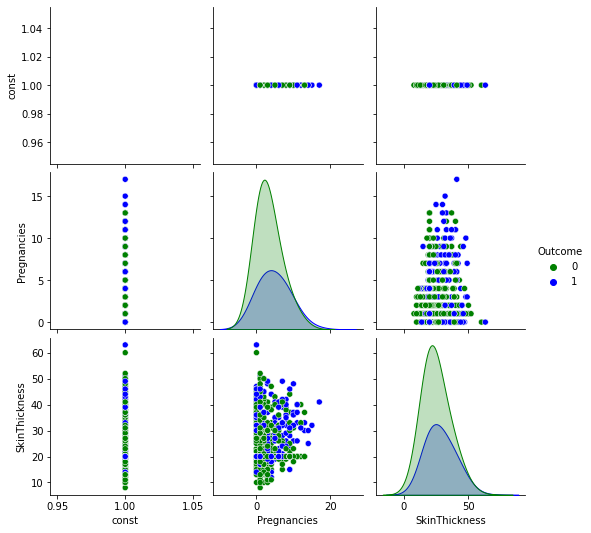

In [ ]:
#d i
#merge together the training data from part c
sub = trainX1.join(trainY1, sort =True)

#some of the skin thickness values were equal to 0 which makes no sense so I added the mean value to them to account for faulty measurement
sub.loc[(sub['SkinThickness'] == 0), 'SkinThickness'] += 20

print(sub)
#plot the data
sb.pairplot(sub, hue='Outcome', palette=['green', 'blue'], diag_kws={'bw_method': 0.9})


     const  Pregnancies  SkinThickness  Outcome
0      1.0            6             35        1
1      1.0            1             29        0
3      1.0            1             23        0
4      1.0            0             35        1
5      1.0            5             20        0
..     ...          ...            ...      ...
761    1.0            9             31        1
762    1.0            9             20        0
765    1.0            5             23        0
766    1.0            1             20        1
767    1.0            1             31        0

[576 rows x 4 columns]


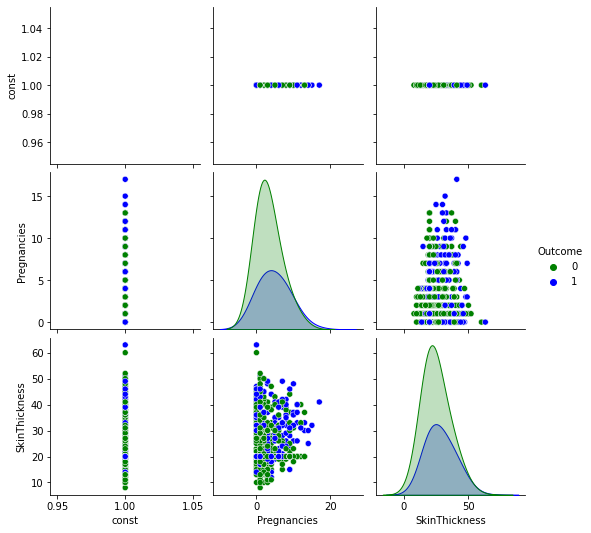

In [ ]:
#d ii
#merge together the training data from part c
sub = trainX1.join(trainY1, sort =True)

#some of the skin thickness values were equal to 0 which makes no sense so I added the mean value to them to account for faulty measurement
sub.loc[(sub['SkinThickness'] == 0 ), 'SkinThickness'] += 20

print(sub)
#plot the data
sb.pairplot(sub, hue='Outcome', palette=['green', 'blue'], diag_kws={'bw_method': 0.9})

This data is lenearly inseperable 

#Question 4
#a) Plot the data

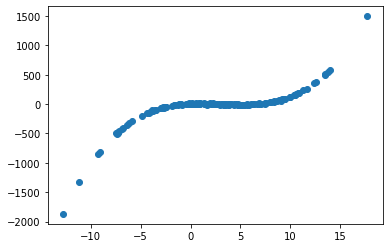

In [ ]:
#Question 4
#a

data = np.genfromtxt("Assig1Q4.csv", delimiter=",", names=["X", "Y"])
plt.scatter(data['X'], data['Y'])


#b) Fit the linear model


MSE =  34193.06122162066


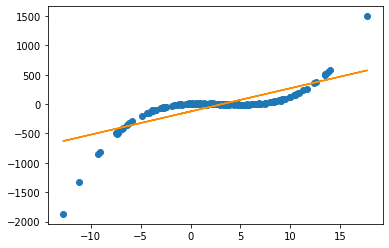

In [ ]:
#b

#create a matrix
A = np.vstack([data['X'], np.ones(len(data['X']))]).T

# y is a column vector
y = data['Y'][:, np.newaxis]

#beta =(X^T * X)^-1 * X^T * Y
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

y_calc = beta[0]*data['X'] + beta[1]

temp = data['Y'] - y_calc
temp = temp**2
temp = np.sum(temp)
mse = temp/len(data['X'])
print("MSE = ", mse)

#plot data
plt.scatter(data['X'], data['Y'])
#plot best fit line
plt.plot(data['X'], y_calc, 'darkorange')

#Fit the cubic model

a =  0.4995630330789019 b =  -4.512068653866269 c =  7.125455457595702 d =  4.60848198521605
MSE =  181463.57537247366


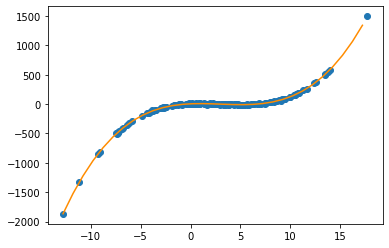

In [ ]:
#f
# https://machinelearningmastery.com/curve-fitting-with-python/ offered some help on this question regarding creating the fit

# the cubic function used to fit the line
def cubic(x, a, b, c, d):
  return a*(x**3) + b*(x**2) + c*x + d

#create a matrix
A = np.vstack([data['X'], np.ones(len(data['X']))]).T
# y is a column vector
y = data['Y'][:, np.newaxis]

#beta calculated for the given data
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

fit, _ = optimize.curve_fit(cubic, data['X'], data['Y'])

a, b, c, d = fit
print('a = ', a, 'b = ',  b,'c = ', c,'d = ', d)

#plot data from the .csv file
plt.scatter(data['X'], data['Y'])

# arange the data to be used in the cubic function
x_sorted = arange(min(data['X']), max(data['X']), 1)

y_calc = cubic(x_sorted, a, b, c, d)


temp = data['Y'] - beta
temp = temp**2
temp = np.sum(temp)
mse = temp/len(data['X'])
print("MSE = ", mse)


#plot best fit line
plt.plot(x_sorted, y_calc, 'darkorange')

# g.
As we can see the cubic fit is much better than the linear fit since the data follows a cubic line almost exactly

#h.
Cubic best-fit is still considered linear regression because the regression function is still linear even if the fit isn't


#Question 5
#a) create the datasets

ValueError: ignored

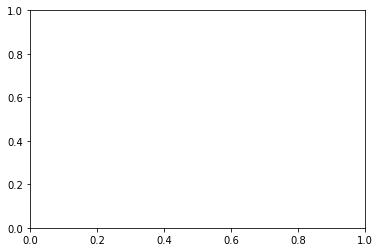

In [ ]:
#using help from tutorial 3

# create roughly linearly seperable data
X, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_informative=2, random_state=5, n_clusters_per_class=1, class_sep=1.7)

#make into a tuple
lin_sep = (X, y)

#creating noise
rng = np.random.RandomState(5) 

# 0.5 noise
X2 = X + 0.5*rng.uniform(size=X.shape)
n3_lin_sep = (X2, y)

# 1 noise
X3 = X + 1*rng.uniform(size=X.shape)
n3_lin_sep = (X3, y)

# 2 noise
X4 = X + 2*rng.uniform(size=X.shape)
n4_lin_sep = (X4, y)


#b), c) train and test the data

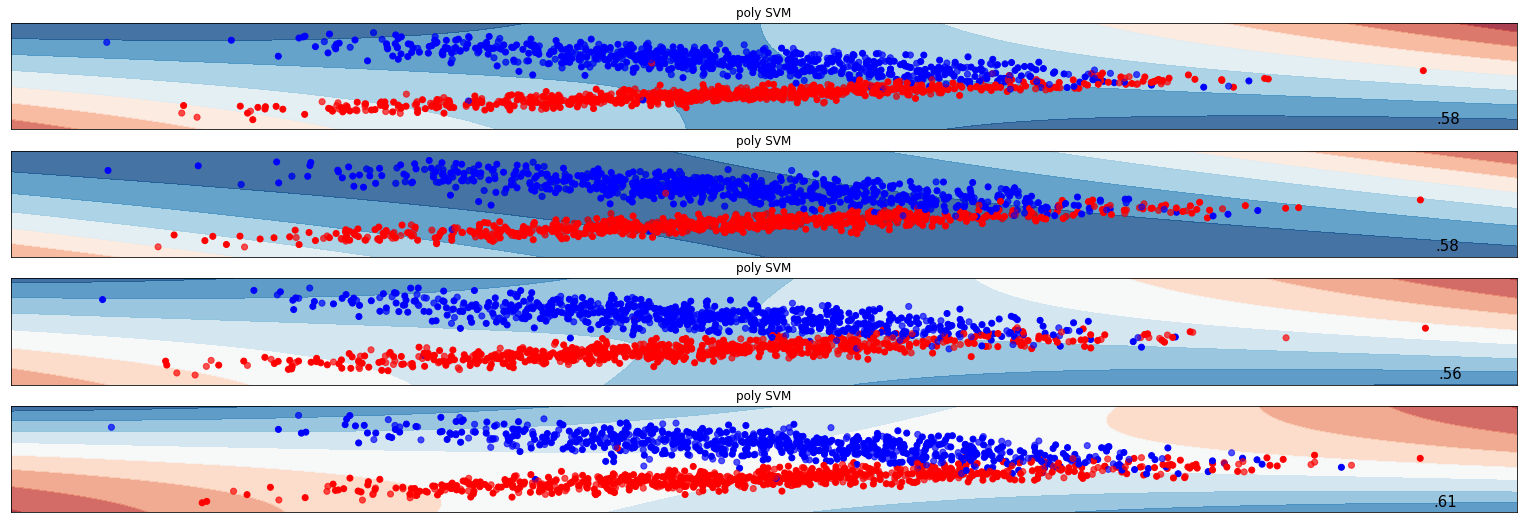

In [ ]:
datasets = [lin_sep, n1_lin_sep, n2_lin_sep, n3_lin_sep]
dataset_names= ["Linearly Separable", "0.5 Noisy Linearly Separable", "1 Noisy Linearly Separable", "2 Noisy Linearly Separable"]

classifier_name = ["poly SVM"]

classifier =[
  SVC(kernel= 'poly', degree=2, C=1.0),   # SVM with polynomial function kernel
  ]

# Useful Plotting Varriables
h = .02  # Resolution in colored mesh visualizations
i = 1    # To keep track of the classifier subplot (column index)
j = 0    # To keep track of the dataset subplots (row index)

figure = plt.figure(figsize=(27, 9))

for ds in datasets:
  X, y = ds
  X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance


  #axis limits
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3)
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), 1, i, title=dataset_names[j])
  j += 1

  # Plot the testing points 
  ax.scatter(testX[:,0], testX[:,1], c=testY, cmap=cm_bright)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  for name, clf in zip(classifier_name, classifier):

    clf.fit(trainX, trainY)
    score = clf.score(testX, testY)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
       
       
    # Plot the training points
    ax.scatter(trainX[:, 0], trainX[:, 1], c=trainY, cmap=cm_bright)
        
    # Plot the testing points (use alpha=0.6 to make them slightly transparent)
    ax.scatter(testX[:, 0], testX[:, 1], c=testY, cmap=cm_bright, alpha=0.6)

    # Set axes limits
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # Add a title and overlay the prediction score onto the bottom-right corner of the plot
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
  


Noise level has virtually no influence on the accuracy at this level

#d) edit C for noise level 0.5

from the sklearn.svc doccumentation:
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

therefore, the higher the value of C the more careful the steps are in training the SVM. This could be see in the values I got of: 0.5, 0.56. 0.57. 0.57, 0.6, 0.61 as the accuracy increased with every higher value of C

